<a href="https://colab.research.google.com/github/Dei-gratia/Machine-Learning-Projects/blob/main/ML%20course%20with%20Python/Dog_Cat__Classification_With_Tranfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#install the kaggle library
!pip install kaggle

In [2]:
#configure the path for kaggle .json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
#download dog vs cat dataset
!kaggle competitions download -c dogs-vs-cats

100% 812M/812M [00:27<00:00, 32.3MB/s]
100% 812M/812M [00:27<00:00, 31.1MB/s]


In [6]:
#extract downloaded file
from zipfile import ZipFile

dataset_path = "/content/dogs-vs-cats.zip"

with ZipFile(dataset_path, "r") as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [9]:
#extract the train folder files
from zipfile import ZipFile

dataset_path = "/content/train.zip"

with ZipFile(dataset_path, "r") as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [10]:
#count files in training folder
import os

path, dirs, files = next(os.walk("/content/train"))
file_count = len(files)
print("Number of images: ",  file_count)

Number of images:  25000


In [11]:
#print the image names
file_names = os.listdir("/content/train")
print(file_names)

['dog.12182.jpg', 'dog.8438.jpg', 'cat.12164.jpg', 'dog.9226.jpg', 'cat.4608.jpg', 'dog.5537.jpg', 'cat.1423.jpg', 'cat.2905.jpg', 'dog.2721.jpg', 'dog.9546.jpg', 'cat.5436.jpg', 'dog.6800.jpg', 'dog.3436.jpg', 'dog.10001.jpg', 'cat.5232.jpg', 'cat.390.jpg', 'dog.7928.jpg', 'cat.1214.jpg', 'cat.5409.jpg', 'dog.11167.jpg', 'cat.5914.jpg', 'dog.7637.jpg', 'cat.1071.jpg', 'cat.11062.jpg', 'dog.7595.jpg', 'cat.8932.jpg', 'dog.2540.jpg', 'dog.7728.jpg', 'dog.8851.jpg', 'cat.2976.jpg', 'cat.481.jpg', 'cat.8671.jpg', 'dog.1996.jpg', 'dog.5732.jpg', 'dog.1120.jpg', 'cat.10145.jpg', 'dog.1042.jpg', 'dog.7565.jpg', 'cat.9531.jpg', 'cat.3560.jpg', 'dog.4899.jpg', 'cat.3381.jpg', 'dog.2380.jpg', 'dog.9517.jpg', 'dog.3185.jpg', 'dog.6840.jpg', 'dog.9549.jpg', 'cat.1905.jpg', 'cat.3055.jpg', 'cat.11083.jpg', 'cat.7547.jpg', 'dog.4128.jpg', 'cat.3813.jpg', 'dog.1556.jpg', 'cat.9535.jpg', 'cat.2368.jpg', 'cat.6363.jpg', 'cat.12472.jpg', 'dog.8646.jpg', 'dog.11420.jpg', 'cat.5192.jpg', 'cat.9818.jpg', 

In [20]:
#import the dependances
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as npimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

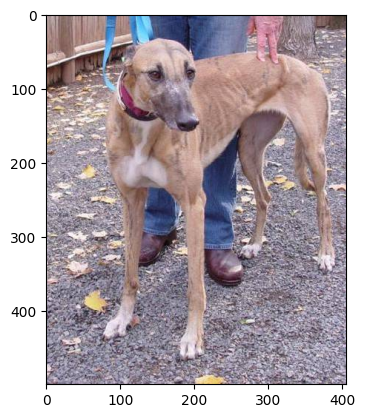

In [16]:
#display dog image
img = npimg.imread("/content/train/dog.12182.jpg")
plt.imshow(img)
plt.show()

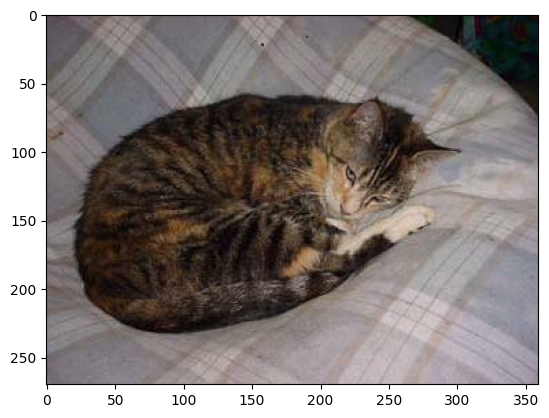

In [17]:
#display cat image
img = npimg.imread("/content/train/cat.12164.jpg")
plt.imshow(img)
plt.show()

In [18]:
#number of dogs and number of cats
dogs = 0
cats = 0
for img_file in file_names:
  name = img_file[0:3]
  if name == "dog":
    dogs += 1
  else:
    cats += 1
print("Number of dogs is: ", dogs)
print("Number of dogs is: ", dogs)

Number of dogs is:  12500
Number of dogs is:  12500


In [19]:
#create a new directory for resized images
os.mkdir("/content/resized_images")

In [23]:
#resizing the images
original_folder = "/content/train/"
resized_folder = "/content/resized_images/"

for i in range(2000):
  filename = os.listdir(original_folder)[i]
  img_path = original_folder + filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert("RGB")

  new_img_path = resized_folder + filename
  img.save(new_img_path)


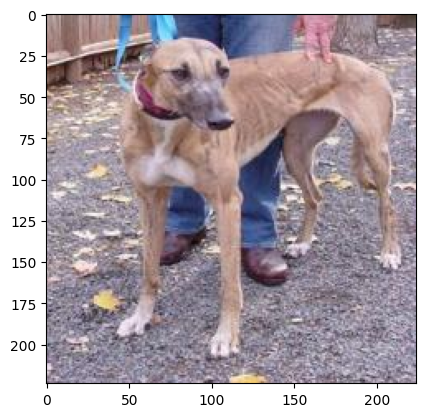

In [25]:

#display dog image
img = npimg.imread("/content/resized_images/dog.12182.jpg")
plt.imshow(img)
plt.show()

In [28]:
#creating labels for resized images
#cats -> 0, dogs -> 1

labels = []
resized_file_names = os.listdir("/content/resized_images")

for i in range(2000):
  img_file = resized_file_names[i]
  name = img_file[0:3]
  if name == "dog":
    labels.append(1)
  else:
    labels.append(0)
print(resized_file_names[:5])
print(labels[:5])

['dog.12182.jpg', 'dog.8438.jpg', 'cat.12164.jpg', 'dog.9226.jpg', 'cat.4608.jpg']
[1, 1, 0, 1, 0]
